In [117]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [118]:
df = pd.read_csv('AirPassengers.csv')

In [119]:
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [120]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [121]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [122]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [123]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [124]:
ds = df.copy()
ds.set_index('ds',inplace=True)

In [125]:
ds

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='ds', ylabel='y'>

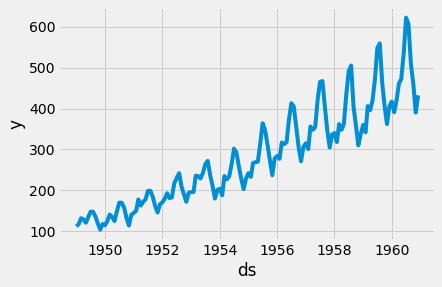

In [126]:
sns.lineplot(data = ds["y"])

In [150]:
my_model = Prophet(interval_width=0.95)

In [151]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [152]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [153]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.762691,604.633237,695.244700
176,1963-09-01,602.208825,561.348708,645.850431
177,1963-10-01,566.146573,521.236559,610.095134
178,1963-11-01,534.150949,488.995501,578.732631
179,1963-12-01,563.790461,519.678582,607.576662


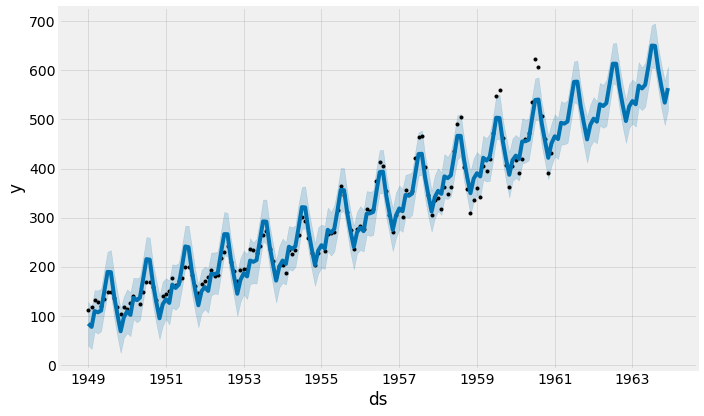

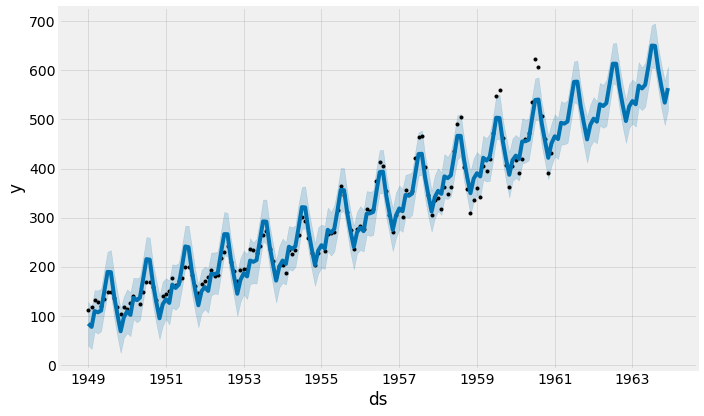

In [154]:
my_model.plot(forecast,
              uncertainty=True)

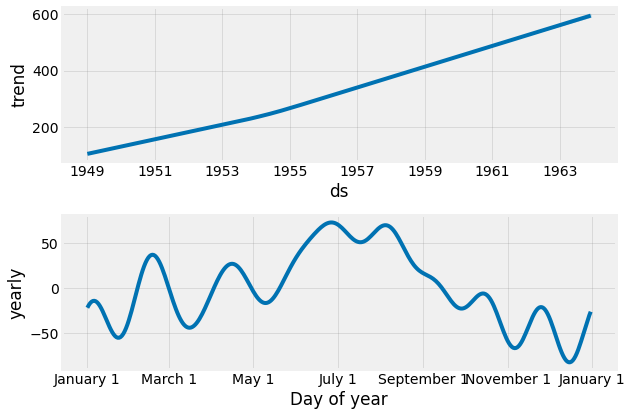

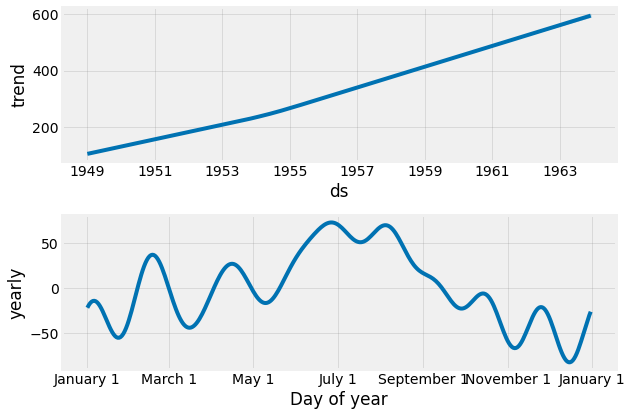

In [155]:
my_model.plot_components(forecast)

In [156]:
fs=forecast.copy()
fs.set_index('ds',inplace=True)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

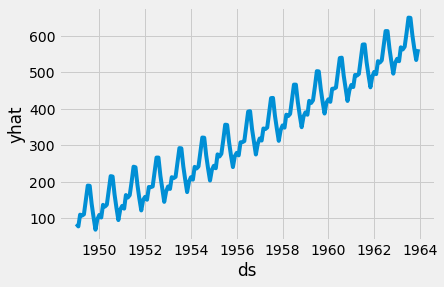

In [158]:
sns.lineplot(data=fs['yhat'])

<AxesSubplot:xlabel='ds', ylabel='yhat'>

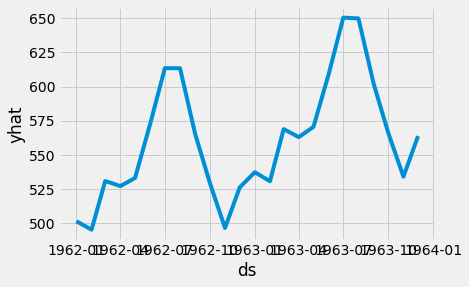

In [163]:
drange = fs.loc["1962": "1963"]
sns.lineplot(data = drange["yhat"])

<AxesSubplot:xlabel='ds', ylabel='yhat'>

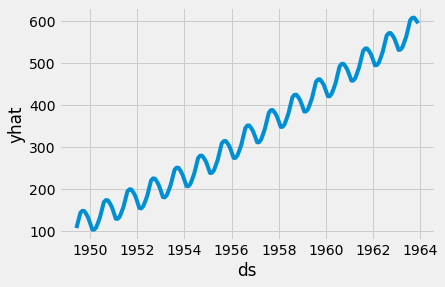

In [164]:
ma = fs["yhat"].rolling(window=6).mean() 
sns.lineplot(data = ma)

<AxesSubplot:xlabel='month', ylabel='yhat'>

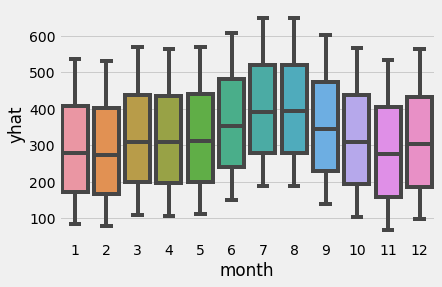

In [168]:
fs["year"] = fs.index.year
fs["month"] = fs.index.month
sns.boxplot(x = 'month', y='yhat', data = fs)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

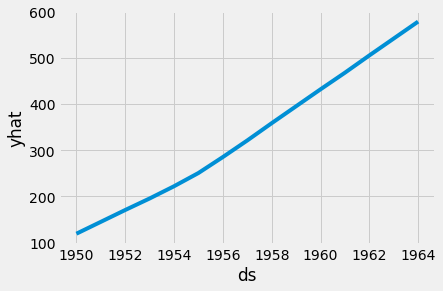

In [170]:
resampled = fs["yhat"].resample("A").mean() 
sns.lineplot(data = resampled)

<AxesSubplot:xlabel='month', ylabel='yhat'>

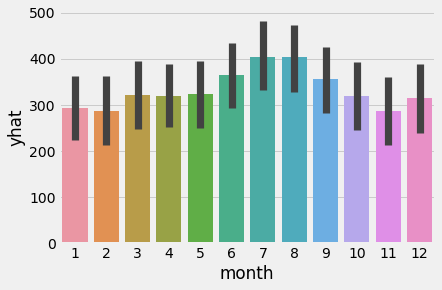

In [172]:
sns.barplot(x = 'month', y='yhat', data = fs)